In [1]:
from model import DataLoader, PCA
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/export/home/ucakir/MEGS/MEGS/src/mypackage/data')
from image_modules import norm


In [2]:
from sklearn.decomposition import PCA

In [3]:
data = DataLoader("/export/home/ucakir/MEGS/MEGS/src/mypackage/data/galaxy_data_10_pf.hdf5")

File: /export/home/ucakir/MEGS/MEGS/src/mypackage/data/galaxy_data_10_pf.hdf5
Group: Galaxies
    Group: Attributes
        Dataset: halo_id (float32)
        Dataset: mass (float32)
    Group: Particles
        Group: stars
            Group: Images
                Dataset: GFM_Metallicity (float32)
                Dataset: GFM_StellarFormationTime (float32)
                Dataset: Masses (float32)


In [4]:
mass = data.get_image("stars", "Masses")
metal = data.get_image("stars", "GFM_Metallicity")
age = data.get_image("stars", "GFM_StellarFormationTime")

In [7]:
norm?

Signature: norm(x, takelog=True, plusone=True, clip=True, lower=0.1, upper=1.0)
Docstring:
Normalize image.

This function is called by the get_image function of the Galaxy class defined in the galaxy.py file. It normalizes the image by taking the log10 of the image and clipping it to the [lower,upper] quantile.
For that we use a mask to ignore the zero values. The image is normalized to the range [0,1].

Parameters
----------
x : numpy.array
    The image to be normalized.
takelog : bool, optional
    If True the log10 of the image is taken. The default is True.
plusone : bool, optional
    If True 1 is added to the image. The default is True.
clip : bool, optional
    If True the image is clipped to the [lower,upper] quantile. The default is True.
lower : float, optional
    The lower quantile. The default is 0.1. Only used if clip = True.
upper : float, optional
    The upper quantile. The default is 1.. Only used if clip = True.
    
Returns
-------
numpy.array
    The normalized i

In [8]:
g.get_field("Masses")

NameError: name 'g' is not defined

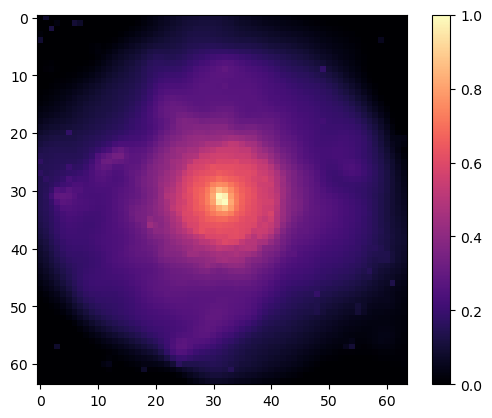

In [6]:
plt.imshow(norm(mass[3]), cmap = "magma")
plt.colorbar()

In [38]:
lower = 0.35
upper = 1.0
mass_norm = norm(mass, plusone=True, takelog=True, clip=True, lower = lower, upper = upper)
metal_norm = norm(metal, plusone=True, takelog=True, clip=True, lower = lower, upper = upper)
age_norm = norm(age, plusone=True, takelog=True, clip=True, lower = lower, upper = upper)

In [74]:
#flatten the images to (N,64*64) array
mass_norm_flat = mass_norm.reshape(mass_norm.shape[0], -1)
metal_norm_flat = metal_norm.reshape(metal_norm.shape[0], -1)
age_norm_flat = age_norm.reshape(age_norm.shape[0], -1)

datamatrix = np.concatenate((mass_norm_flat, metal_norm_flat, age_norm_flat), axis=1)

In [76]:
ncomp = 100
pca = PCA(n_components=ncomp)


scores = pca.fit_transform(datamatrix)
inverse = pca.inverse_transform(scores)
eigen = pca.components_.reshape(ncomp, 3,64, 64)

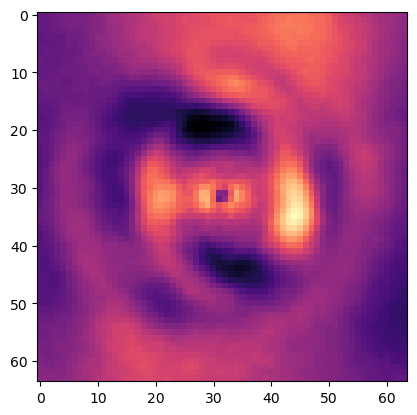

In [93]:
plt.imshow(eigen[50,0], cmap="magma")

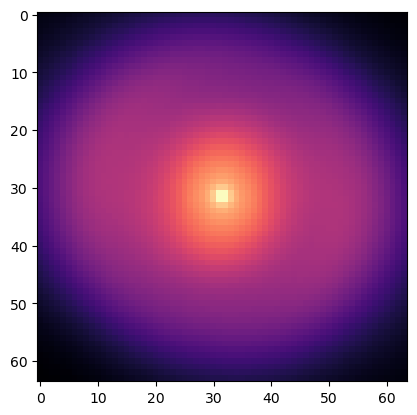

In [99]:
plt.imshow(inverse[6].reshape(3,64,64)[0], cmap="magma")

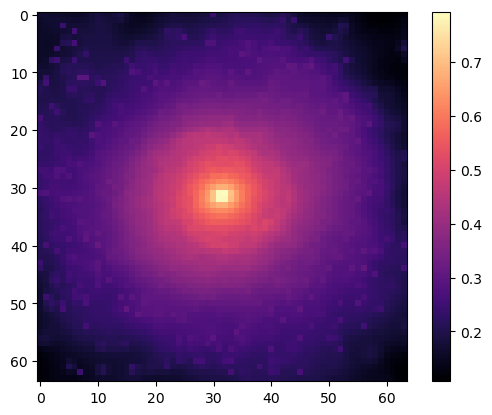

In [39]:
plt.imshow(mass_norm[4], cmap = "magma")
plt.colorbar()

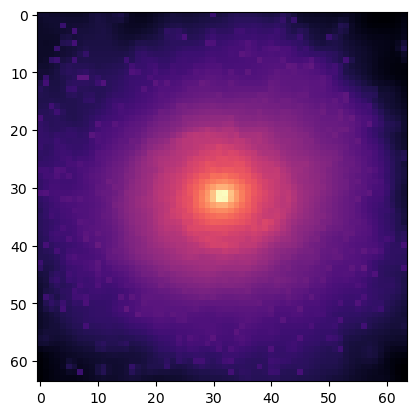

In [20]:
plt.imshow(mass_norm[4], cmap = "magma")

In [42]:
lower = 0.3
upper = 1.0
norm_function_args = {"Masses": {"takelog": True, "plusone": True,"lower": lower, "upper": upper},
                     "GFM_Metallicity": {"takelog": True, "plusone": True, "lower": lower, "upper": upper},
                     "GFM_StellarFormationTime": {"takelog": True, "plusone": True, "lower": lower, "upper": upper},
                    
}

In [43]:
model = PCA(data, norm_function = norm, norm_function_kwargs=norm_function_args)

(64, 64)
Creating datamatrix with the following fields:
Particle type:  stars
Fields:  ['GFM_Metallicity', 'GFM_StellarFormationTime', 'Masses']
norm_function_kwargs:  {'Masses': {'takelog': True, 'plusone': True, 'lower': 0.3, 'upper': 1.0}, 'GFM_Metallicity': {'takelog': True, 'plusone': True, 'lower': 0.3, 'upper': 1.0}, 'GFM_StellarFormationTime': {'takelog': True, 'plusone': True, 'lower': 0.3, 'upper': 1.0}}
Default arguments are used for the fields that are not specified in the norm_function_kwargs
Created datamatrix with shape:  (12484, 12288)


In [44]:
datamatrix = model.datamatrix

In [46]:
pca = PCA(n_components=50)
scores = pca.fit_transform(datamatrix)


In [66]:
eigen = pca.components_
inverse = pca.inverse_transform(scores)

In [67]:
inverse.shape

(12484, 12288)

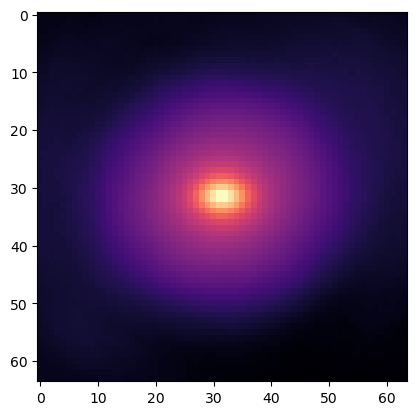

In [73]:
plt.imshow(inverse[9].reshape(3,64,64)[0],cmap = "magma")

In [48]:
eigen = eigen.reshape(pca.n_components_,len(model.data._image_fields["stars"]), 64,64)

In [49]:
import matplotlib.pyplot as plt


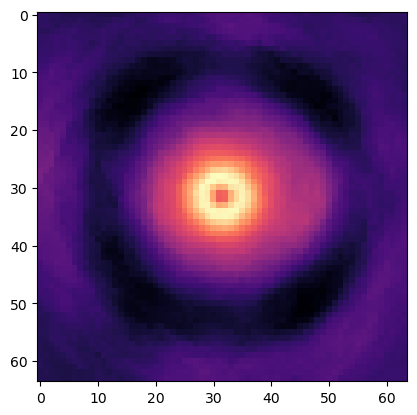

In [65]:
plt.imshow(eigen[20,0], cmap = "magma")

In [19]:
img = datamatrix.reshape(12484,3,64,64)

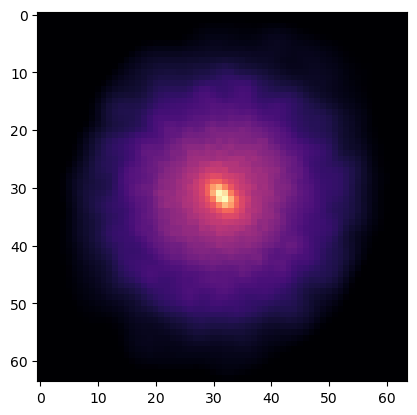

In [82]:

test = data.get_image("stars", "Masses", 16)
plt.imshow(norm(test, takelog=True, plusone=True, lower=0.3, upper=1.), cmap = "magma")


In [34]:
images = data.get_image("stars", "Masses")
mass = images.reshape(12484,64*64)
mass = norm(mass, **norm_function_args["Masses"])

metallicity = data.get_image("stars", "GFM_Metallicity")
metallicity = metallicity.reshape(12484,64*64)
metallicity = norm(metallicity, **norm_function_args["GFM_Metallicity"])


age = data.get_image("stars", "GFM_StellarFormationTime")
age = age.reshape(12484,64*64)
age = norm(age, **norm_function_args["GFM_StellarFormationTime"])


In [35]:
datamatrix = np.concatenate((mass, metallicity, age), axis=1)

In [53]:
pca = PCA(n_components=50)
scores = pca.fit_transform(datamatrix)
eigen = pca.components_.reshape(pca.n_components_,3,64,64)
inverse = pca.inverse_transform(scores)

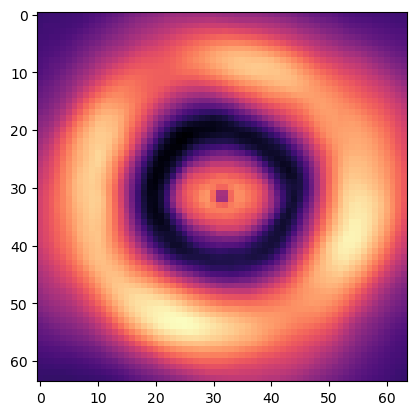

In [51]:
plt.imshow(eigen[40,0], cmap = "magma")

In [56]:
inverse = inverse.reshape(12484,3,64,64)

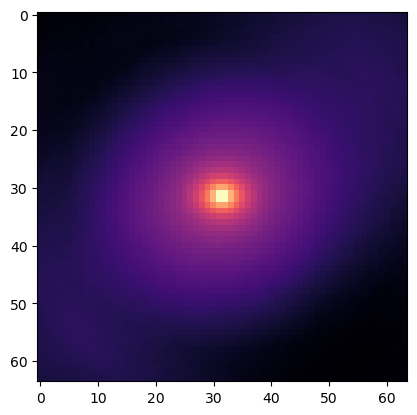

In [62]:
plt.imshow(inverse[17,1], cmap = "magma")

In [52]:
pca.explained_variance_ratio_.sum()

0.9527321

In [89]:
x = np.array([[1,2,3],[1,2,3]])
y = np.array([[4,5,6],[4,5,6]])

x = np.concatenate((x,y), axis=1)
x

array([[1, 2, 3, 4, 5, 6],
       [1, 2, 3, 4, 5, 6]])

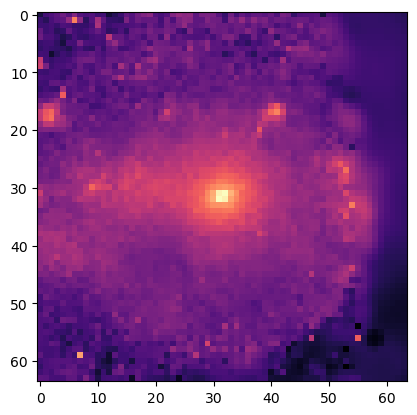

In [27]:
plt.imshow(img[1][0], cmap = "magma")

In [20]:
plt.imshow(img[,0], cmap = "magma")

SyntaxError: invalid syntax (2628048632.py, line 1)

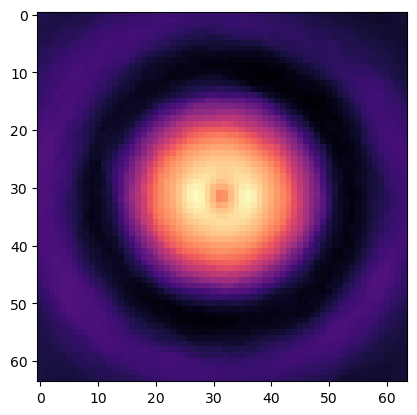

In [39]:
plt.imshow(eigen[15][0], cmap = "magma")

In [22]:
len(model.data._image_fields["stars"])

3

In [23]:
64*64*3

12288